## Dataset Overview
Rock Paper Scissors is a dataset containing 2,892 images of diverse hands in Rock/Paper/Scissors poses.
Rock Paper Scissors contains images from a variety of different hands, from different races, ages and genders, posed into Rock / Paper or Scissors and labelled as such. These images have all been generated using CGI techniques as an experiment in determining if a CGI-based dataset can be used for classification against real images.

Note that all of this data is posed against a white background.

Each image is 300×300 pixels in 24-bit color

## Import Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Rock-Paper-Scissors', 'rock-paper-scissors']


## Explore the Data

In [2]:
rock_dir = os.path.join('../input/rock-paper-scissors/Rock-Paper-Scissors/train/rock')
paper_dir = os.path.join('../input/rock-paper-scissors/Rock-Paper-Scissors/train/paper')
scissors_dir = os.path.join('../input/rock-paper-scissors/Rock-Paper-Scissors/train/scissors')

print('Total training rock images:', len(os.listdir(rock_dir)))
print('Total training paper images:', len(os.listdir(paper_dir)))
print('Total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

Total training rock images: 840
Total training paper images: 840
Total training scissors images: 840
['rock03-099.png', 'rock03-049.png', 'rock01-048.png', 'rock07-k03-090.png', 'rock02-030.png', 'rock05ck01-010.png', 'rock06ck02-076.png', 'rock04-046.png', 'rock01-011.png', 'rock02-038.png']
['paper06-050.png', 'paper02-044.png', 'paper04-056.png', 'paper02-048.png', 'paper06-081.png', 'paper06-051.png', 'paper03-029.png', 'paper07-045.png', 'paper01-109.png', 'paper03-090.png']
['scissors02-118.png', 'testscissors02-000.png', 'scissors04-006.png', 'testscissors01-081.png', 'scissors04-048.png', 'scissors04-054.png', 'testscissors03-058.png', 'testscissors01-042.png', 'testscissors01-053.png', 'testscissors01-001.png']


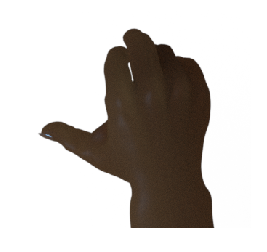

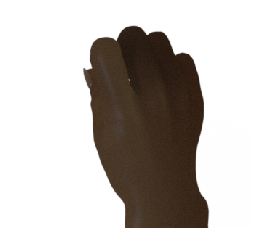

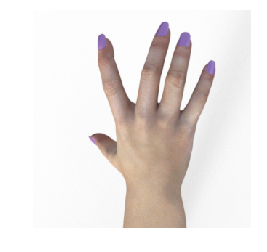

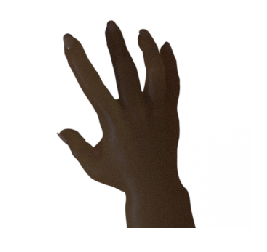

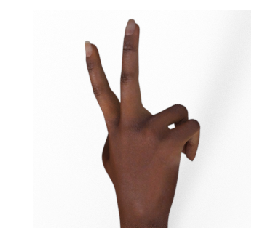

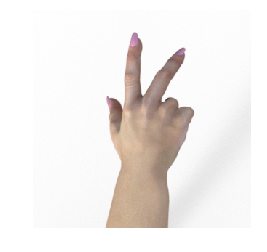

In [3]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

## Data Preprocessing

In [4]:
TRAINING_DIR = "../input/rock-paper-scissors/Rock-Paper-Scissors/train/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "../input/rock-paper-scissors/Rock-Paper-Scissors/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


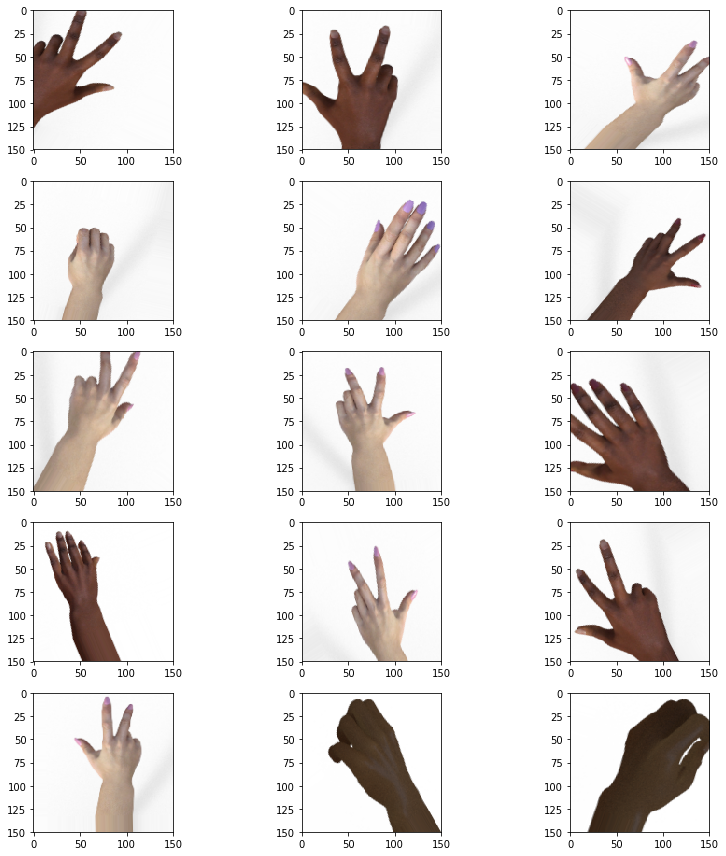

In [5]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Building Model

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Training

In [9]:
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
79/79 [==============================] - 43s 545ms/step - loss: 1.1346 - acc: 0.3786 - val_loss: 1.0352 - val_acc: 0.4301
Epoch 2/25
79/79 [==============================] - 20s 250ms/step - loss: 0.8499 - acc: 0.6000 - val_loss: 0.3626 - val_acc: 0.9247
Epoch 3/25
79/79 [==============================] - 21s 263ms/step - loss: 0.5666 - acc: 0.7702 - val_loss: 0.1047 - val_acc: 0.9624
Epoch 4/25
79/79 [==============================] - 21s 268ms/step - loss: 0.3823 - acc: 0.8484 - val_loss: 0.0639 - val_acc: 0.9785
Epoch 5/25
79/79 [==============================] - 21s 263ms/step - loss: 0.2966 - acc: 0.8861 - val_loss: 0.0827 - val_acc: 1.0000
Epoch 6/25
79/79 [==============================] - 20s 257ms/step - loss: 0.2075 - acc: 0.9163 - val_loss: 0.1026 - val_acc: 0.9651
Epoch 7/25
79/79 [==============================] - 21s 264ms/step - loss: 0.1799 - acc: 0.9357 - val_loss: 0.1730 - val_acc: 0.9086
Epoch 8/25
79/79 [==============================] - 20s 259ms/step - 

## Evaluating Accuracy and Loss for the Model

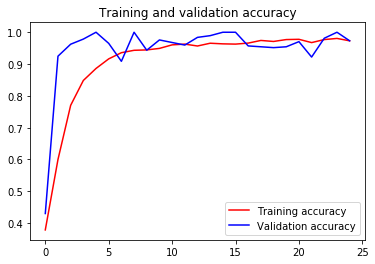

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Running the Model

In [11]:
# load all images into a list
images = []
img_folder = os.path.join('../input/rock-paper-scissors/Rock-Paper-Scissors/validation')
img_files = os.listdir(img_folder)
img_files = [os.path.join(img_folder, f) for f in img_files]
# print(img_files)
for img in img_files:
    img = load_img(img, target_size=(150, 150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
# print(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[0 0 1 2 1 0 0 2 2 1 2 0 2 0 2 2 1 0 2 1 1 2 0 1 2 2 1 1 0 1 0 1 0]


## Visualizing Intermediate Representations

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


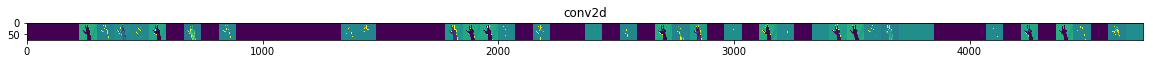

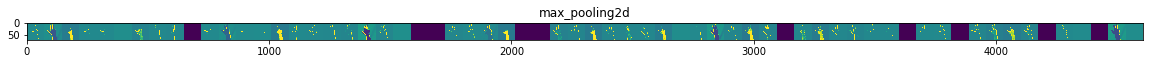

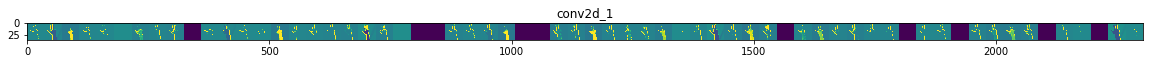

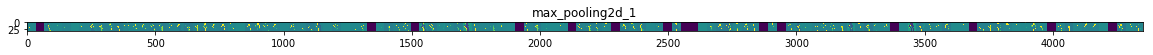

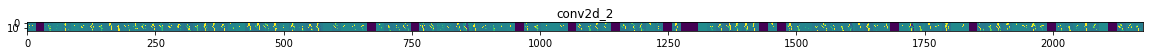

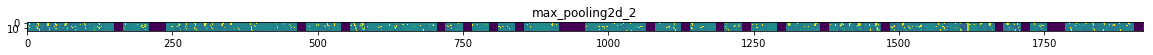

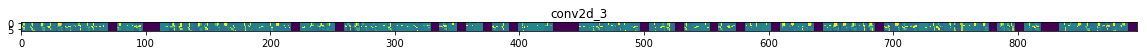

In [12]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a rock,paper or scissors from the training set.
rock_img_files = [os.path.join(rock_dir, f) for f in rock_files]
paper_img_files = [os.path.join(paper_dir, f) for f in paper_files]
scissors_img_files = [os.path.join(scissors_dir, f) for f in scissors_files]

img_path = random.choice(rock_img_files + paper_img_files+scissors_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )